---
# ASSIGNMENT 2
---

##### Project Overview
---

Using what you,ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

##### This dataset contains
---

The location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BORORUGH : A digit code for the borough the property is located in; in order these are Manhattan(1), Bronx(2), Brooklyn(3), Queens(4), and Staten Island(5).

- BLOCK; LOT : The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE :  The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount : $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

- This dataset uses the financial definition of a building/building unit, for tax puposes. In case a single entity owns the building ini question, a sale covers the value of the entire buildding. In case a building is owned piecemeal by its residents (a condominium), a sale refers to single apartement (or group of apartement) owned by some individual.

---
# Library
---

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Preprocessing

In [2]:
# membaca dataset
df_sales = pd.read_csv ("nyc-rolling-sales.csv")

In [3]:
# menampilkan 5 data teratas didataset
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# menampilkan 5 data terbawah didataset
df_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Sekarang, akan mencari tahu ada berapa banyak baris dan kolom didalam dataset

In [5]:
# menampilkan baris dan kolom di dataset
df_sales.shape

(84548, 22)

Diketahui bahwa didalam dataset, ada sebanyak 84.548 baris dengan banyak kolom 22

Untuk melihat informasi dasar tentang kerangka data

In [6]:
# menampilkan informasi type data setiap variabel
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
# melihat list header kolom
df_sales.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [8]:
# melihat daftar index
df_sales.index.values

array([    0,     1,     2, ..., 84545, 84546, 84547], dtype=int64)

In [9]:
# melihat ringkasan kolom setiap kerangka
df_sales.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


##### Bersihkan Data

Disini kita akan menghapus kolom-kolom yang tidah diperlukan

In [10]:
# hapus kolom
kol = (["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER", "ADDRESS", "ZIP CODE", ])
df_sales.drop(kol, axis=1, inplace=True)

# menampilkan 5 data teratas
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Disini kita akan mengganti tipe yang dibutuhkan

In [11]:
# mengubah tipe untuk beberapa kolom menjadi category

Categoricals = ["NEIGHBORHOOD","BUILDING CLASS CATEGORY",
                "TAX CLASS AT PRESENT","BUILDING CLASS AT PRESENT",
                "TAX CLASS AT TIME OF SALE","BUILDING CLASS AT TIME OF SALE"]

for col in Categoricals:
    df_sales[col]=df_sales[col].astype("category")

In [12]:
# mengubah tipe untuk beberapa kolom menjadi numeric

Nmrc = ["BOROUGH","LAND SQUARE FEET",
        "GROSS SQUARE FEET","SALE PRICE" ]

for col in Nmrc:
    df_sales[col]=pd.to_numeric(df_sales[col], errors="coerce")

Kita akan memeriksa jika ada missing value

In [13]:
# cek missing value
missing = round((df_sales.isnull().sum())/len(df_sales)*100, 2)
missing = (pd.DataFrame((missing)[missing>0]))
missing = missing.rename(columns={0:"percent missing"})
missing

,percent missing
LAND SQUARE FEET,31.05
GROSS SQUARE FEET,32.66
SALE PRICE,17.22


Berdasarkan hasil diatas, LAND SQUARE FEET memiliki persentase missing sebanyak 31%, GROSS SQUARE FEET memiliki persentase missing sebanyak 33%, dan SALE PRICE memiliki persentase missing sebanyak 17%.

Selanjutnya, kita akan di drop missing value.

In [14]:
# drop missing value
df_sales = df_sales.dropna()

In [15]:
# periksa kembali jika ada missing value
df_sales.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

Selanjutnya, kita akan memeriksa data jika ada data yang terduplikat

In [16]:
df_sales.duplicated().sum()

403

Diketahui sebanyak 403 baris data terduplikat, untuk itu kita akan menghapus data yang terduplikat

In [17]:
# drop data duplikat
df_sales.drop_duplicates(inplace=True)

# cek kembali duplikat data
print(sum(df_sales.duplicated()))

0


In [18]:
df_sales.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,47841.000000,47841.000000,47841.000000,47841.00000,47841.000000,47841.000000,4.784100e+04,4.784100e+04,47841.000000,4.784100e+04
mean,3.255534,4995.682176,234.953074,2.50279,0.237391,2.759161,3.261740e+03,3.500266e+03,1828.399260,1.159345e+06
std,0.901980,3429.821717,496.153115,16.44339,10.851727,19.825053,3.054095e+04,2.899514e+04,463.183273,1.345030e+07
min,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2224.000000,21.000000,1.00000,0.000000,1.000000,1.405000e+03,8.200000e+02,1920.000000,1.000000e+05
50%,3.000000,4666.000000,45.000000,1.00000,0.000000,1.000000,2.133000e+03,1.620000e+03,1931.000000,4.850000e+05
75%,4.000000,7009.000000,94.000000,2.00000,0.000000,2.000000,3.050000e+03,2.508000e+03,1961.000000,8.350000e+05
max,5.000000,16319.000000,9009.000000,1844.00000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


Selanjutnya, kita akan mengapus value = 0

In [19]:
df_sales = df_sales[(df_sales["LAND SQUARE FEET"] != 0) & 
            (df_sales["GROSS SQUARE FEET"] != 0) & 
            (df_sales["YEAR BUILT"] > 1700) & 
            (df_sales["SALE PRICE"] > 5000) & 
            (df_sales["TOTAL UNITS"] != 0)
            ]

In [20]:
df_sales.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [21]:
# mengubah index 
df_sales.reset_index(drop=True, inplace=True)
df_sales.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


Mengubah nama wilayah 

In [22]:
df_sales["BOROUGH"] = df_sales["BOROUGH"].map({1:"Manhattan", 
                                               2:"Bronx", 
                                               3:"Brooklyn", 
                                               4:"Queens",
                                               5:"Staten Island"})

Distribusi Borough

In [34]:
df_borough= df_sales["BOROUGH"].unique()

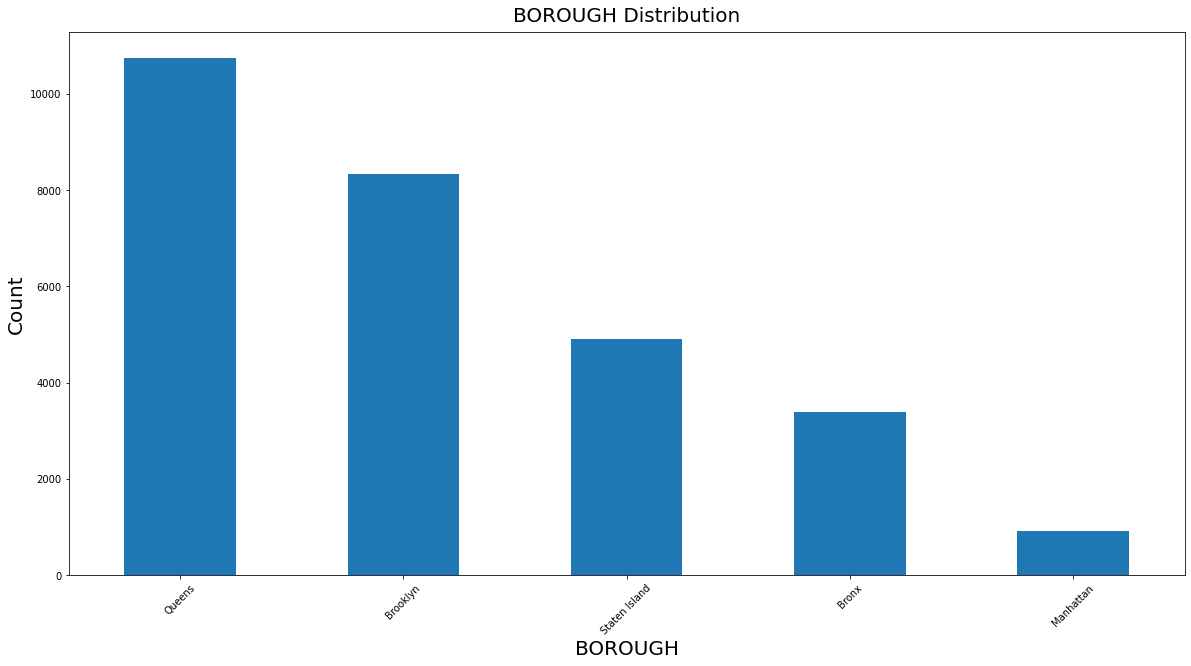

In [35]:
df_sales["BOROUGH"].value_counts().plot(kind='bar',
                                        figsize=(20,10) )

plt.title("BOROUGH Distribution", pad=10, fontsize = 20)
plt.xlabel("BOROUGH",fontsize = 20)
plt.ylabel("Count",fontsize = 20)

plt.xticks(rotation = 45)

plt.show()

---
# Measure of Central Tendency
---

# MEAN

Pertanyaan : Bagaimana SALE PRICE untuk setiap wilayah di NYC ?

In [25]:
df_borough = df_sales[["BOROUGH","SALE PRICE"]]
# set index
df_borough_mean = df_borough.reset_index()[["BOROUGH", 
                                          "SALE PRICE"]].groupby(["BOROUGH"]).mean().sort_values(by="SALE PRICE",
                                           ascending=True)
# menampilkan data 
df_borough_mean

,SALE PRICE
BOROUGH,
Staten Island,5.415304e+05
Queens,9.312954e+05
Bronx,1.055587e+06
Brooklyn,1.559464e+06
Manhattan,2.013562e+07


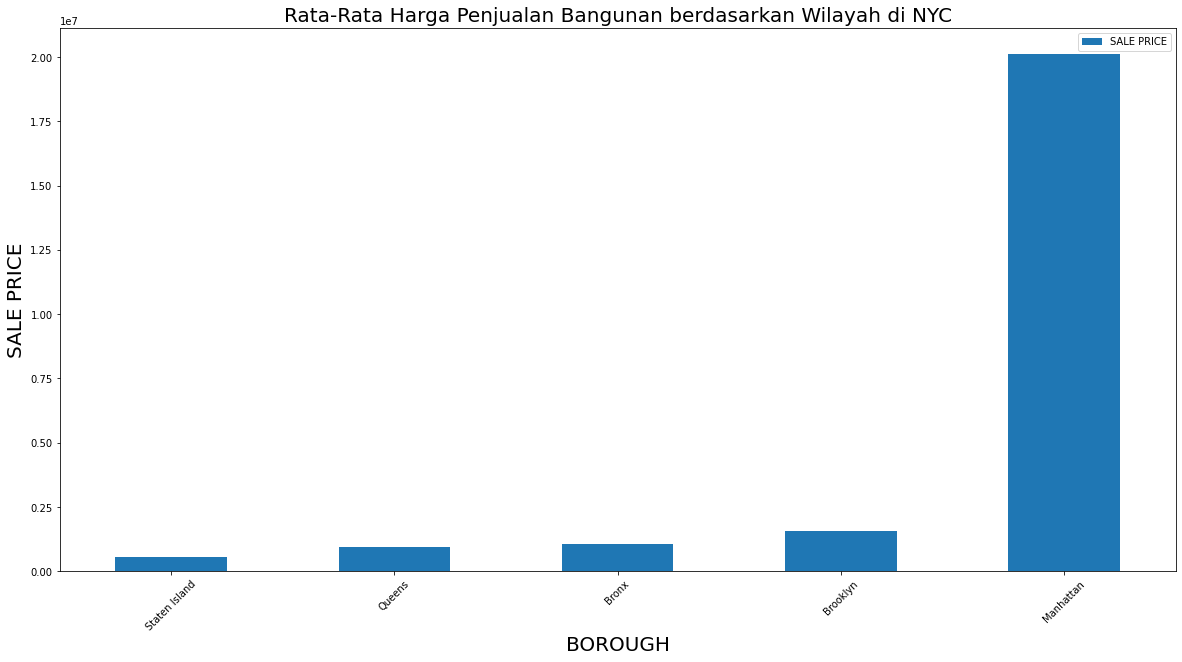

In [26]:
# inisiasi bar chart
df_borough_mean.plot(kind = 'bar', 
                    figsize=(20,10), 
                    legend = True)

# membuat nama judul bar chart
plt.title("Rata-Rata Harga Penjualan Bangunan berdasarkan Wilayah di NYC", fontsize = 20)
# membuat nama xlabel
plt.xlabel("BOROUGH", fontsize = 20)
# membuat nama ylabel
plt.ylabel("SALE PRICE", fontsize = 20)

plt.xticks(rotation = 45)

# menampilkan bar chart
plt.show()

Berdasarkan hasil diatas dapat diketahui bahwa penjualan rata-rata gedung disetiap wilayah mempunyai perbedaan yang signifikan. Bisa dilihat dari, wilayah Manhattan menjadi wilayah yang rata-rata penjualannya tertinggi sedangkah wilayah yang rata-rata penjualannya rendah berada di Staten Island.

In [27]:
df_sales.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


Penjualan (SALE PRICE) rata-rata bangunan berdasarkan kelas bangunannya (BUILDING CLASS CATEGORY)

In [28]:
df_sales["BUILDING CLASS CATEGORY"].nunique()

29

Diketahui 29 kategori class di dataset.

In [29]:
df_bc= df_sales[["BUILDING CLASS CATEGORY","SALE PRICE"]]

# 5 kategori kelas yang memiliki rata-rata harga penjualan tertinggi
top5bc = df_bc.groupby("BUILDING CLASS CATEGORY").mean().sort_values(by="SALE PRICE", ascending=True)
top5bc = top5bc.head(5)
top5bc

,SALE PRICE
BUILDING CLASS CATEGORY,
06 TAX CLASS 1 - OTHER,576228.750000
01 ONE FAMILY DWELLINGS,671561.833585
05 TAX CLASS 1 VACANT LAND,767020.166667
02 TWO FAMILY DWELLINGS,807144.888786
10 COOPS - ELEVATOR APARTMENTS,913460.593750


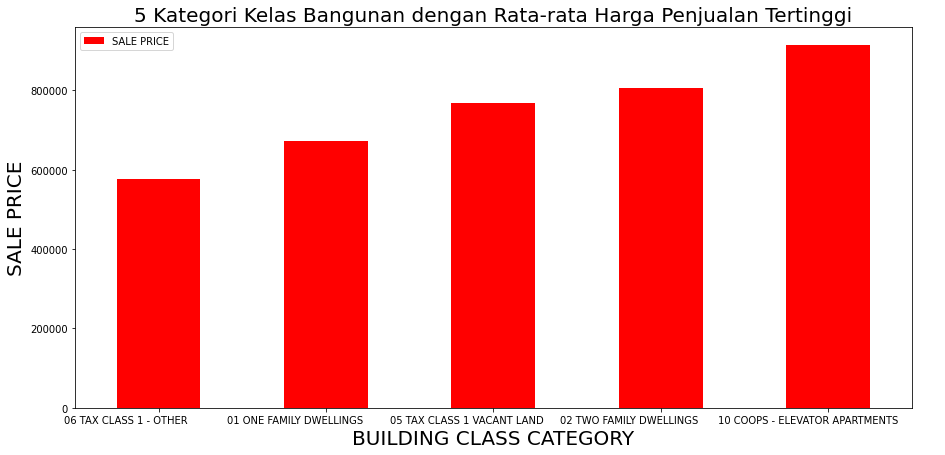

In [30]:
top5bc.plot(kind='bar', figsize=(15,7), color='r')
# membuat tittle
plt.title("5 Kategori Kelas Bangunan dengan Rata-rata Harga Penjualan Tertinggi", fontsize=20)
# membuat nama xlabel
plt.xlabel("BUILDING CLASS CATEGORY", fontsize = 20)
# membuat nama ylabel
plt.ylabel("SALE PRICE", fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Berdasarkan hasil di atas, maka diketahui bahwa kategori ELEVATOR APARTMENTS memiliki rata-rata harga penjualan tertinggi, diikuti dengan kategori TWO FAMILY DWELLINGS, TAX CLASS 1 VACANT LAND, dan sebagainya. Sehingga dapat ditarik kesimpulan kategori kelas bangunan mempengaruhi variasi rata-rata harga penjualan bangunan tersebut.

---
# MEDIAN

In [31]:
df_borough = df_sales[["BOROUGH","SALE PRICE"]]
# set index
df_borough_median = df_borough.reset_index()[["BOROUGH", 
                                          "SALE PRICE"]].groupby(["BOROUGH"]).median().sort_values(by="SALE PRICE",
                                           ascending=True)
# menampilkan data 
df_borough_median

,SALE PRICE
BOROUGH,
Bronx,490000.0
Staten Island,490000.0
Queens,645475.5
Brooklyn,880000.0
Manhattan,6800000.0


Berdasarkan hasil diatas menunjukkan SALE PRICE yang ada di di wilayah NYC memiliki nilai median yang mirip di beberapa wilayah. Bisa dilihat untuk wilayah Bronx dan Staten Island memiliki nilai median yang sama (490000), untuk wilayah Queens (645451) dan Brooklyn memiliki nilai median(880000), sedangkan untuk wilayah Manhattan sendiri agak berbeda dari ke empat wilayah yang lain, krna SALE PRICE yang ada memiliki nilai median (6800000)

---
# MODUS

In [36]:
for BOROUGH in df_borough:
    print(f"{BOROUGH}\t{df_sales[df_sales['BOROUGH'] == BOROUGH]['SALE PRICE'].mode()[0]}")

Manhattan	8000000.0
Bronx	500000.0
Brooklyn	1300000.0
Queens	650000.0
Staten Island	450000.0


Berdasarkan hasil diatas modus sale price dari setiap wilayah NYC semuanya berbeda dengan modus yang paling tinggi di wilayah Manhattan dan yang rendah di wilayah Staten Island.

In [ ]:
df_sales["BOROUGH"].mode()[0]

'Queens'

Dari 5 wilayah yang ada Queens menjadi modus dari wilayah lainnya.

---
# Measure of Spread

---
# RANGE

In [ ]:
print(f"BOROUGH \tMIN\tMAX\t\tRANGE") 
print()

for BOROUGH in df_borough:
    minx = df_sales[df_sales["BOROUGH"] == BOROUGH]["SALE PRICE"].min()
    maxx = df_sales[df_sales["BOROUGH"] == BOROUGH]["SALE PRICE"].max()
    
    print(f"{BOROUGH}\t{minx}\t{maxx}\t{maxx-minx}")

BOROUGH 	MIN	MAX		RANGE

Manhattan	5997.0	2210000000.0	2209994003.0
Bronx	6500.0	110000000.0	109993500.0
Brooklyn	6500.0	154250000.0	154243500.0
Queens	6000.0	257500000.0	257494000.0
Staten Island	5700.0	11900000.0	11894300.0


Berdasarkan hasil diatas, maka wilayah Manhattan mempunyai nilai range yang lebih besar/selisih lebih besar dibandingkan dengan wilayah lainnya.yang artinya memungkinkan persebaran penjualan units di wilayah Manhattan lebih luas mulai dengan kisaran harga yang bervariasi. Sedangkan, wilayah Staten Island memiliki nilai range yang lebih kecil/selisih yang kecil dari wilayah lain.

---
# VARIANCE

In [ ]:
df_sales.groupby(["BOROUGH"]).var()["SALE PRICE"]

BOROUGH
Bronx            1.488592e+13
Brooklyn         2.310912e+13
Manhattan        8.417556e+15
Queens           1.410737e+13
Staten Island    2.162773e+11
Name: SALE PRICE, dtype: float64

Berdasarkan hasi diatas maka nilai variance terlihat adanya perbedaan distribusi antara 5 wilayah di NYC. Wilayah Manhattan mempunyai rentang harga yang lebih bervariasi. Sedangkan wilayah Staten Island mempunyai rentang harga yang lebih kecil.

---
# STD

In [ ]:
df_sales.groupby(["BOROUGH"]).std()["SALE PRICE"]

BOROUGH
Bronx            3.858228e+06
Brooklyn         4.807194e+06
Manhattan        9.174724e+07
Queens           3.755978e+06
Staten Island    4.650562e+05
Name: SALE PRICE, dtype: float64

Berdasarkan hasil diatas maka std dari setiap wilayah berbeda-beda, dapat dilihat juga dari ke 5 wilayah di NYC wilayah Manhattan nilai std untuk penjualan units (SALE PRICE) yang lebih bervariasi dari pada ke 4 wilayah yang lainnya.

---
# Probability Distribution

Pertanyaan : Bagaimana Distribusi SALE PRICE ?

In [ ]:
z = np.abs(stats.zscore(df_sales["SALE PRICE"])).sort_values()
filtered = z < 3

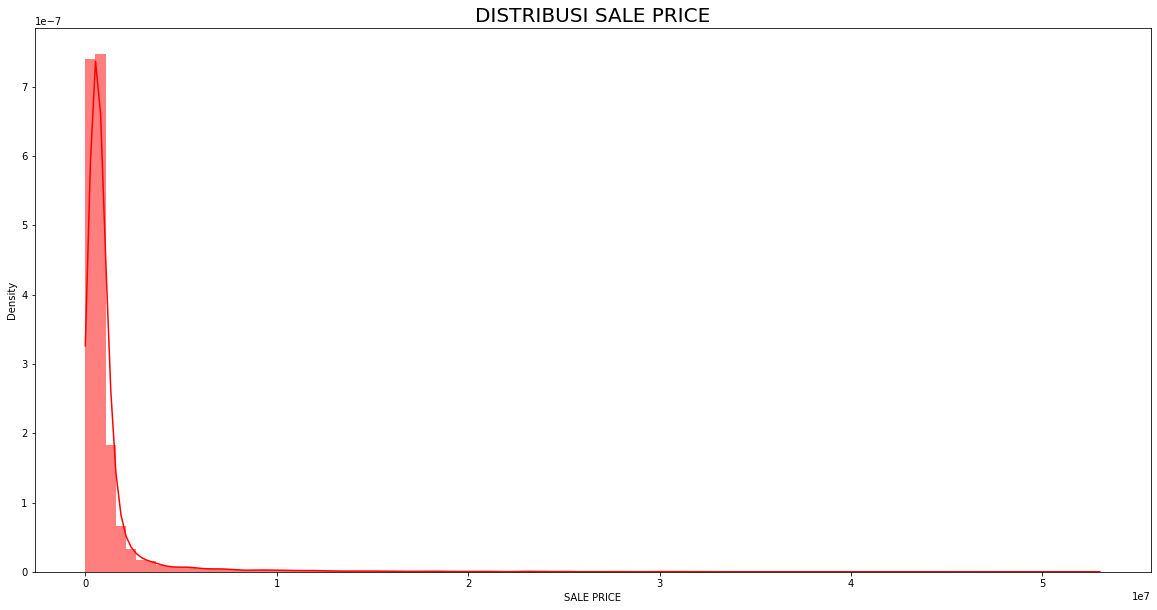

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df_sales.loc[filtered, :]["SALE PRICE"], 
             color="red", bins=100, 
             kde=True, 
             stat="density", 
             linewidth=0);
plt.title("DISTRIBUSI SALE PRICE", fontsize = 20)
plt.show()

Setelah outlier dengan z-score > 3 dihapus, distribusi SALE PRICE menjadi lebih normal secara visual. Distribusi SALE PRICE memiliki kemiringan yang positif kekiri. Dari bentuknya distribusi diprediksi terdistribusi dalam bentuk gamma distribution atau juga bisa eksponensial.

---
# Confidence Interval

Pertanyaan : Bagaimana convidence interval dari sale price rata-rata penjualan units di wilayah NYC?

In [ ]:
#mendefinisikan kolom SALE PRICE sebagai x
x = df_sales["SALE PRICE"] 

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom atau derajat bebas untuk menentukan nilai statistik uji

confidence = 0.95 #peluang 
t_crit = np.abs(t.ppf((1-confidence)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))), 2)

print(values)

[1486384.87 1889284.56]


Berdasarkan hasil di atas, diketahui bahwa rata-rata harga penjualan (SALE PRICE) di wilayah NYC berada di antara 1.486.384 USD sampai 1.889.284 USD dengan peluang atau selang kepercayaan 0.95 atau 95%.

---
# Hypothesis Testing

Disini kita akan membuat hypothesis testing antara LAND SQUARE FEET dan SALE PRICE. Maka dari itu, asumsi ini akan dibuktikan apakah LAND SQUARE FEET mempengaruhi SALE PRICE menggunakan statistik uji Chi-Square dengan hipotesis sebagai berikut:

H0: LAND SQUARE FEET tidak mempengaruhi nilai SALE PRICE

H1:LAND SQUARE FEET mempengaruhi nilai SALE PRICE

In [ ]:
# membuat list berisikan nilai LAND SQUARE FEET dan SALE PRICE
df_hipo= [df_sales["LAND SQUARE FEET"], df_sales["SALE PRICE"]] 

stat, p, dof, expected = chi2_contingency(df_hipo)

print("stat=%.3f, p=%.3f" % (stat, p))

if p > 0.05:
    print("Probably Independent")
else:
    print("Probably Dependent")

stat=3714928143.231, p=0.000
Probably dependent


Berdasarkan hasil diatas maka analisis uji Chi-square berikut diketahui bahwa p-value < 0.05 yang berarti H0 ditolak. Sehingga, LAND SQUARE FEET mempengaruhi nilai SALE PRICE.

# KESIMPULAN

- Wilayah Manhattan mempunyai penjualan rata-rata yang tinggi dibandingkan dengan wilayah-wilayah lainnya yang ada NYC.
- Wilayah Staten Island mempunyai penjualan rata-rata terendah dibandingkan dengan wilayah-wilayah lainnya yang di NYC.
- LAND SQUARE FEET berpengaruh untuk setiap penjualan (SALE PRICE)
- Rata-rata harga penjualan (SALE PRICE) di wilayah NYC berada di antara 1.486.384 USD sampai 1.889.284 USD dengan peluang atau selang kepercayaan 0.95 atau 95%.
- Berdasarkan hasil di atas, maka diketahui bahwa kategori ELEVATOR APARTMENTS memiliki rata-rata harga penjualan tertinggi, diikuti dengan kategori TWO FAMILY DWELLINGS, TAX CLASS 1 VACANT LAND, dan sebagainya. Sehingga dapat ditarik kesimpulan kategori kelas bangunan mempengaruhi variasi rata-rata harga penjualan bangunan tersebut.